# Retrieving data from WhatsApp
## Modules Used
- Regular Expressions -> To create a pattern
- Pandas -> To clean the data
- Matplotlib -> To plot the data
- Collections
- Emoji



In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
import emoji

##### Import the WhatsApp chat in the same folder as you save this file  
##### Copy the name of the chat and paste it in the below cell

In [63]:
file0 = 'WhatsApp Chat with Sinners🙊'+'.txt'

## Preprocess
- Now it's time to preprocess the data  
- Here we use regular expressions to match the month, year, time, name, and message of the data
- We split the data and create separate columns such as: "Date	User	Message	Year	Month	Day	Hour	Minute"



In [64]:
file = open(file0, 'r', encoding = 'utf-8')
data = file.read()

pattern = '\d{1,2}/\d{1,2}/\d{1,4},\s\d{1,2}:\d{1,2}\s-\s'

messages = re.split(pattern, data)[1:]
dates = re.findall(pattern, data)

df = pd.DataFrame({ 'User Message': messages,
                   'M_Date': dates
                  })
df['M_Date'] = pd.to_datetime(df['M_Date'], format='%d/%m/%y, %H:%M - ')
df.rename(columns = {'M_Date': 'Date'}, inplace=True)

users = []
message1 = []

for msg in df['User Message']:
    splitting = re.split('([\w\W]+?):\s', msg)
    if splitting[1:]:
        users.append(splitting[1])
        message1.append(splitting[2])
    else:
        users.append('group_notification')
        message1.append(splitting[0])


df['User'] = users
df['Message'] = message1
df.drop(columns=['User Message'], inplace=True)

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day']  = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
    
df.head()

,Date,User,Message,Year,Month,Day,Hour,Minute
0,2019-08-24 21:35:00,group_notification,Messages and calls are end-to-end encrypted. N...,2019,August,24,21,35
1,2019-08-24 21:35:00,group_notification,"Salman Khan, M A created group ""Sinners🙊""\n",2019,August,24,21,35
2,2019-08-24 21:35:00,group_notification,"Salman Khan, M A added you\n",2019,August,24,21,35
3,2019-08-24 21:36:00,"Salman Khan, M A",Welcome to the group guys\n,2019,August,24,21,36
4,2019-08-24 21:36:00,Abhishek R Shetty,Just 4 ..?\n,2019,August,24,21,36


## Stop Words and Most common Words
- Stop Words are nothing but conjunctions and articles
- With this and chat file have to download separate stop words file and make sure it's there in the same directory
- We're removing group notifications, media shared so that it'll not be in the list of most common words

In [65]:

    
f = open('stop words.txt', 'r')
stop_words = f.read()
temp = df[df['User'] != 'group notification']
temp = temp[temp['Message'] != '<Media omitted>\n']

words = []

for _ in temp['Message']:
    for i in _.lower().split():
        if i not in stop_words.split():
            words.append(i)
x = pd.DataFrame(Counter(words).most_common(20))
x.rename(columns={0:'words', 1:'Repeated'}, inplace=True)


x

,words,Repeated
0,😂😂,254
1,yeah,219
2,😂,207
3,guys,166
4,know,140
5,send,120
6,one,110
7,😂😂😂,97
8,dont,96
9,y,93


## Month Timeline
- Which displays number of messages exchanged in the particular month


In [66]:

    
df['month_number'] = df['Date'].dt.month
duration = df.groupby(['Year','month_number', 'Month']).count()['Message'].reset_index()
month_year = []
for _ in range(duration.shape[0]):
    month_year.append(duration['Month'][_] + "-" + str(duration['Year'][_]))
duration['Month-Year'] = month_year
duration['Month-Year'] 

0        August-2019
1     September-2019
2       October-2019
3      November-2019
4      December-2019
5       January-2020
6      February-2020
7         March-2020
8         April-2020
9           May-2020
10         June-2020
11         July-2020
12       August-2020
13    September-2020
14      October-2020
15     November-2020
16     December-2020
17      January-2021
18     February-2021
19        March-2021
20        April-2021
21          May-2021
22         June-2021
23         July-2021
24       August-2021
Name: Month-Year, dtype: object

# Stats
- Stats includes
    1. Total Messages from (individual and overall)
    2. Media Messages
    3. Number of words from (individual and overall)
    4. Number of messages by individuals
    5. Total Messages exchanged in each month
    6. Total Messages exchanged in each day
    7. Most busiest day
- Plotted above information using Matplotlib

In [67]:
def stats(select_user,df):
    fig, axis = plt.subplots(5, figsize=(30, 30))
    if select_user == 'ALL':
        total_messages = df.shape[0]
        media_messages = df[df['Message'] == '<Media omitted>\n'].shape[0]
        
        m_fig = x.plot(kind = 'barh',
              x = 'words',
              y = 'Repeated', ax =axis[0], figsize=(20, 20))
        
        
        axis[0].title.set_text("Most Common Words")
        
        
        
        
        
        
        
        
        number_of_words = []
        for message in df['Message']:
            number_of_words.extend(message.split())
       
        
        print(f"Total Messages = {total_messages}") 
        print(f"Total Number of Words = {(len(number_of_words))}")
        print(f"Total Media Messages = {media_messages}")
       
    
    else:
        new_df = (df[df['User'] == select_user])
        total_messages = new_df.shape[0]
        
        
     
        number_of_words = []
        for message in df['Message']:
            number_of_words.extend(message.split())
            
        
            
            
        
        m_fig = x.plot(kind = 'barh',
          x = 'words',
          y = 'Repeated')
        plt.title("Most Common Words")
            
        print(f"Total Messages = {total_messages}") 
        print(f"Total Number of Words = {(len(number_of_words))}")
        
        
    
    i = df['User'].value_counts().head()
    name = i.index
    count = i.values
    axis[1].title.set_text("Number of messages by individuals")
    axis[1].bar(name, count)
    
    duration.plot(kind = 'line',
      x = 'Month-Year',
      y = 'Message',ax = axis[2])
    axis[2].set_xlabel('Month-Year')
    axis[2].set_ylabel('Number of messaages')
    axis[2].title.set_text('Month vs Messages')
    
    df['date'] = df['Date'].dt.date
    daily_messages = df.groupby(['date']).count()['Message'].reset_index()
    daily_messages.plot(kind = 'line',
          x = 'date',
          y = 'Message', ax=axis[3])
    axis[3].set_xlabel('Days')
    axis[3].set_ylabel('Number of Daily Messages')
    axis[3].set_title('Days vs Messages')
    
    
    df['day_name'] = df['Date'].dt.day_name()
    day_name = df['day_name'].value_counts().reset_index()
    day_name.rename(columns={'index':'Day Name', 'day_name':'Number of Messages'}, inplace=True)
    day_name.plot(kind = 'barh',
      x = 'Day Name',
      y = 'Number of Messages', ax = axis[4])
    axis[4].set_xlabel('Days')
    axis[4].set_ylabel('Number of Daily Messages')
    axis[4].set_title('Days vs Messages')
    
    plt.tight_layout()

## Better to select ALL in the below input or else you've to input exact Name you've saved in the cellphone

In [68]:
select_user = str(input())

ALL


Total Messages = 9371
Total Number of Words = 33940
Total Media Messages = 1308


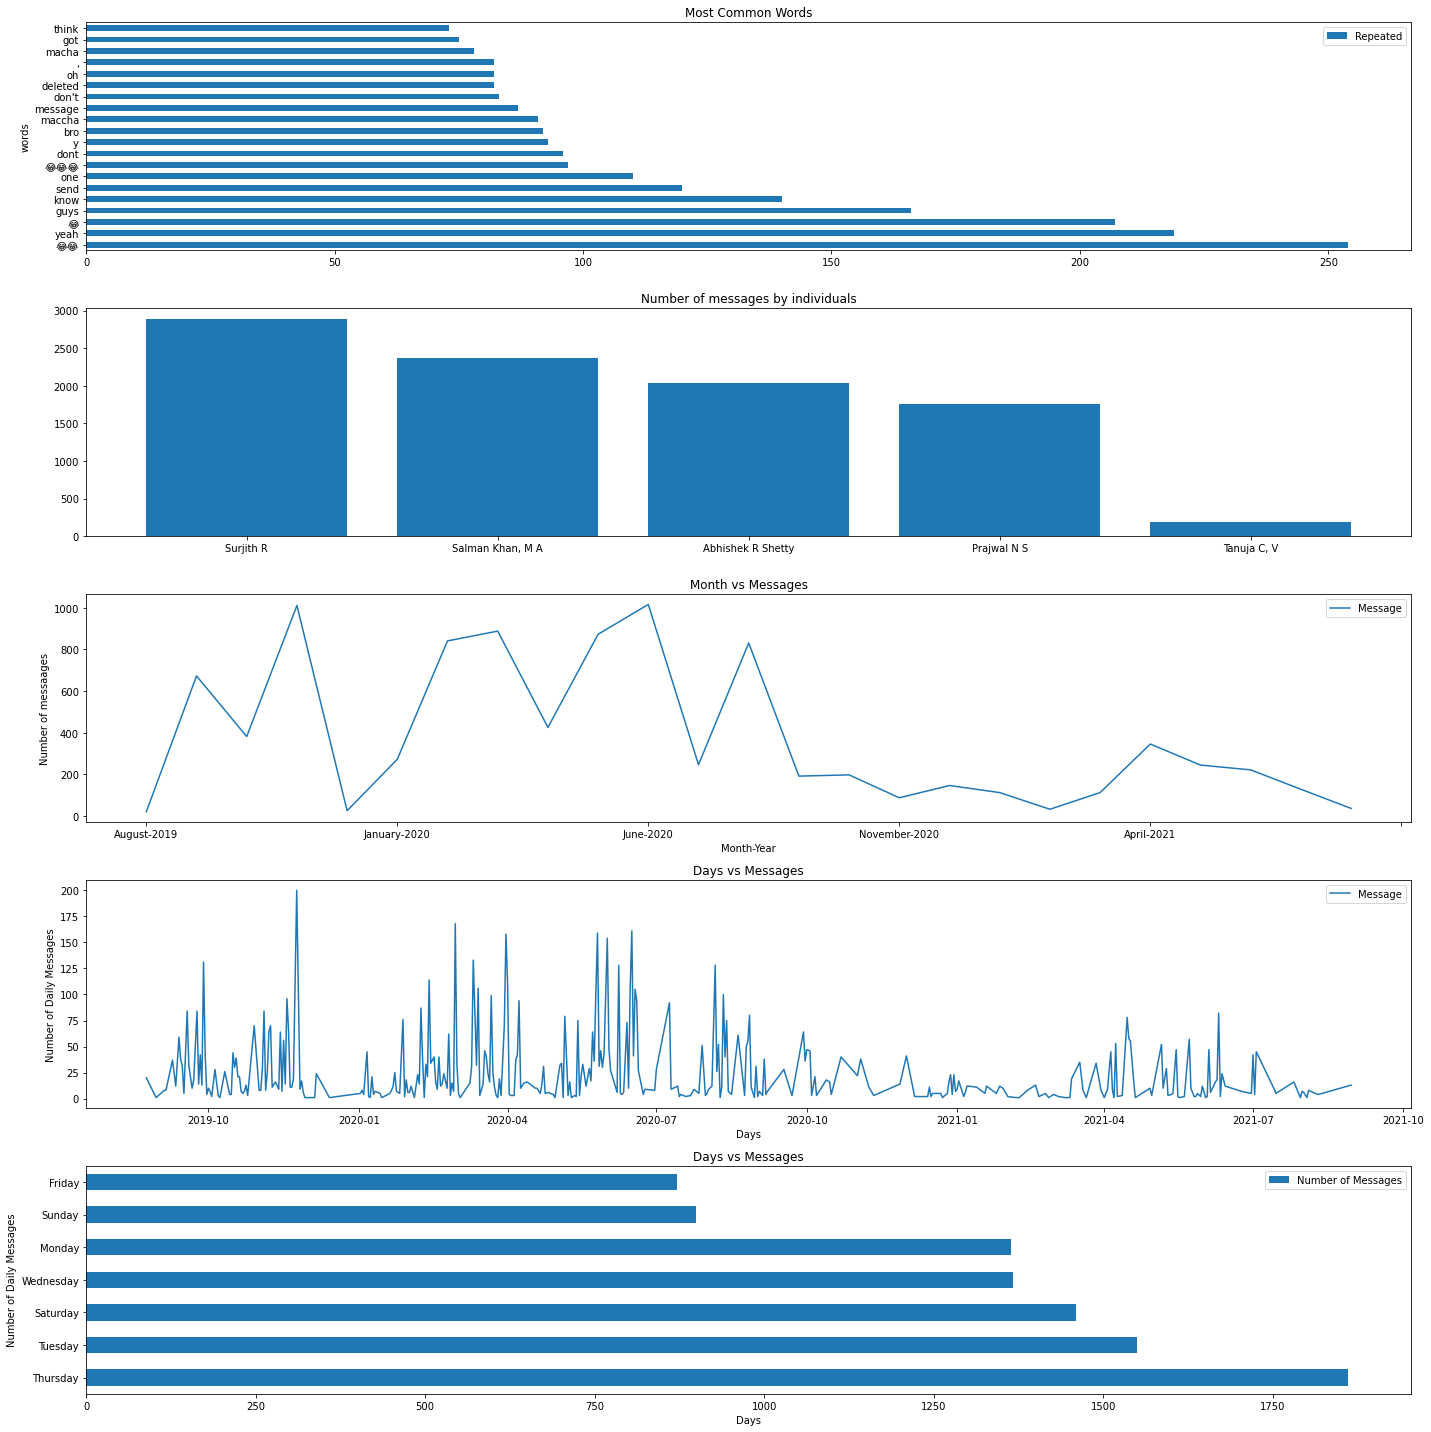

In [69]:
stats(select_user,df)